# Explore here

In [180]:

#! importante
#? duda
#TODO: 
#// borrar
#* esto no se pa que es 


#### Naive bayes --> independant variables --> no correlation between predictors

##### gaussian_NB --> data is continuous (gaussian implies normal distribution --> continuous)

##### multinomial_NB --> all variables are discrete (multinomial distribution)

##### bernoulli_NB --> all variables are binary (1s and 0s)



In [181]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from pickle import dump

In [182]:

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv')
df.head(10)

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0
5,com.facebook.katana,idk i can't edit my posts? things such as my ...,0
6,com.facebook.katana,major flaws constant updates and always getti...,0
7,com.facebook.katana,video issues since i was forced into this upd...,0
8,com.facebook.katana,this update completely destroyed my facebook...,0
9,com.facebook.katana,"posting issues for the last week, there's bee...",0


get embeddings --> checkear eso en vez de knn

In [183]:
df.to_csv('../data/raw/playstore_reviews.csv', index=False)

### Starting the Project

polarity
0    584
1    307
Name: count, dtype: int64


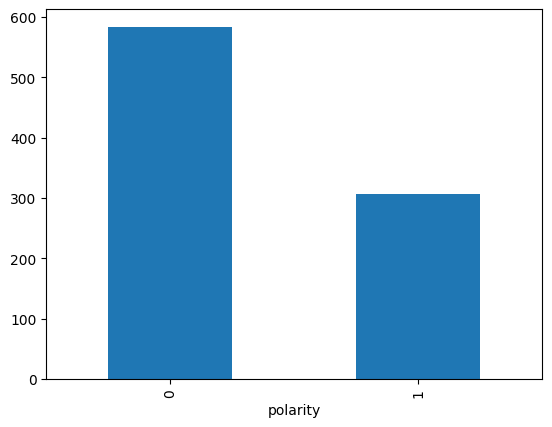

In [184]:
df['polarity'].value_counts().plot(kind='bar')
print(df['polarity'].value_counts())

In [185]:
print('Missing values:') 
print(df.isnull().sum())
print("")
print('Duplicates:')    
print(df.duplicated().sum())

print("")   
print('Unique values:')
print(df.nunique())

Missing values:
package_name    0
review          0
polarity        0
dtype: int64

Duplicates:
0

Unique values:
package_name     23
review          891
polarity          2
dtype: int64


##### Package Name

In [186]:
print(df['package_name'].value_counts())
print(df['package_name'].unique())

package_name
com.facebook.katana           40
com.evernote                  40
com.linkedin.android          40
com.king.candycrushsaga       40
com.imangi.templerun2         40
com.supercell.clashofclans    40
org.mozilla.firefox           40
com.opera.mini.native         40
com.viber.voip                40
com.facebook.orca             40
com.uc.browser.en             40
com.Slack                     40
com.dropbox.android           40
com.hamrokeyboard             39
com.whatsapp                  39
com.twitter.android           39
com.google.android.talk       39
com.tencent.mm                39
com.android.chrome            39
com.rovio.angrybirds          39
com.hamropatro                38
com.shirantech.kantipur       36
jabanaki.todo.todoly          24
Name: count, dtype: int64
['com.facebook.katana' 'com.twitter.android' 'com.linkedin.android'
 'com.king.candycrushsaga' 'com.imangi.templerun2'
 'com.supercell.clashofclans' 'com.android.chrome' 'com.tencent.mm'
 'com.viber.voi

### Haciendo caso a las guidelines del proyecto

In [187]:
df = df.drop('package_name', axis=1)
df.head()
print(df['review'][0])

 privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.


In [188]:
df['review'] = df['review'].str.strip().str.lower()
df['review'][0]

"privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

In [189]:
X = df['review']
y = df['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=21)

X_train.head()

278    account in private it just keep on saying that...
261    bookmark folders what happened to the bookmark...
839         thank you very much for sticky notification.
790    very good, but reposition and either fix or re...
58     dont download not enough trump memes too much ...
Name: review, dtype: object

In [190]:
vec_model = CountVectorizer(stop_words = 'english')
X_train_vec = vec_model.fit_transform(X_train).toarray()
X_test_vec = vec_model.transform(X_test).toarray()
X_test_vec


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [191]:
print(X_test_vec.shape)
print(X_train_vec.shape)

(446, 2489)
(445, 2489)


In [192]:
model = BernoulliNB()
model.fit(X_train_vec, y_train)

BernoulliNB()

In [195]:
y_pred = model.predict(X_test_vec)
print(y_pred[:10])

y_pred_train = model.predict(X_train_vec)
print(y_pred_train[:10])

[1 0 0 0 0 0 0 0 1 0]
[0 0 0 1 0 0 0 1 0 1]


In [197]:
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred)
f1_score_train = f1_score(y_train, y_pred_train)

precision_test = precision_score(y_test, y_pred)
precision_train = precision_score(y_train, y_pred_train)

recall_test = recall_score(y_test, y_pred)
recall_train = recall_score(y_train, y_pred_train)

print("Test Score: ")
print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)
print("")
print("Train Score: ")
print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

print("")
print("Model 1: ")
print("")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

Test Score: 
Accuracy Test:  0.7443946188340808
F1 score Test:  0.4672897196261682
Precision Test:  0.819672131147541
Recall Test:  0.32679738562091504

Train Score: 
Accuracy Train:  0.9078651685393259
F1 score Train:  0.846441947565543
Precision Train:  1.0
Recall Train:  0.7337662337662337

Model 1: 

              precision    recall  f1-score   support

    Negative       0.73      0.96      0.83       293
    Positive       0.82      0.33      0.47       153

    accuracy                           0.74       446
   macro avg       0.78      0.64      0.65       446
weighted avg       0.76      0.74      0.71       446



In [200]:
model_gaussian = GaussianNB()
model_multinomial = MultinomialNB()

model_gaussian.fit(X_train_vec, y_train)
model_gaussian_pred = model_gaussian.predict(X_test_vec)

model_multinomial.fit(X_train_vec, y_train)
model_multinomial_pred = model_multinomial.predict(X_test_vec)

In [201]:

print("")
print("Model Bernoulli: ")
print("")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


print("")
print("Model Gaussian: ")
print("")
print(classification_report(y_test, model_gaussian_pred, target_names=["Negative", "Positive"]))


print("")
print("Model Multinomial: ")
print("")
print(classification_report(y_test, model_multinomial_pred, target_names=["Negative", "Positive"]))


Model Bernoulli: 

              precision    recall  f1-score   support

    Negative       0.73      0.96      0.83       293
    Positive       0.82      0.33      0.47       153

    accuracy                           0.74       446
   macro avg       0.78      0.64      0.65       446
weighted avg       0.76      0.74      0.71       446


Model Gaussian: 

              precision    recall  f1-score   support

    Negative       0.80      0.85      0.82       293
    Positive       0.67      0.59      0.63       153

    accuracy                           0.76       446
   macro avg       0.74      0.72      0.73       446
weighted avg       0.76      0.76      0.76       446


Model Multinomial: 

              precision    recall  f1-score   support

    Negative       0.86      0.86      0.86       293
    Positive       0.74      0.73      0.73       153

    accuracy                           0.82       446
   macro avg       0.80      0.79      0.80       446
weighted avg 

In [202]:
dump(model_gaussian, open('../models/model_gaussian.pkl', 'wb'))
dump(model_multinomial, open('../models/model_multinomial.pkl', 'wb'))
dump(model, open('../models/model_bernoulli.pkl', 'wb'))